Introduction: This project started as a way to check my *Intro to Probability* homework solutions. As such, some of the problems are from Prof. Nicolaescu's *Notes on Elementary Probability*. I deeply enjoy simulating probability problems, so I suspect this project will not end any time soon!

In [1]:
# Import necessary modules

import random
import math
import string
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Law of large numbers demonstration

def coin_flip(num_iterations):
  heads = 0
  for i in range(num_iterations):
    if random.random() < 0.5:
      heads += 1
  return heads / num_iterations

# Intuitively, we expect the chance of a head-landing to be 50%

print(f"Probability of a coin flip landing heads is {coin_flip(10)*100}% (10 trials)")
print(f"Probability of a coin flip landing heads is {coin_flip(100)*100}% (100 trials)")
print(f"Probability of a coin flip landing heads is {coin_flip(1000000)*100}% (1000000 trials)")

Probability of a coin flip landing heads is 60.0% (10 trials)
Probability of a coin flip landing heads is 49.0% (100 trials)
Probability of a coin flip landing heads is 50.027% (1000000 trials)


Stay win rate is 33.22%
Stay win rate is 66.78%


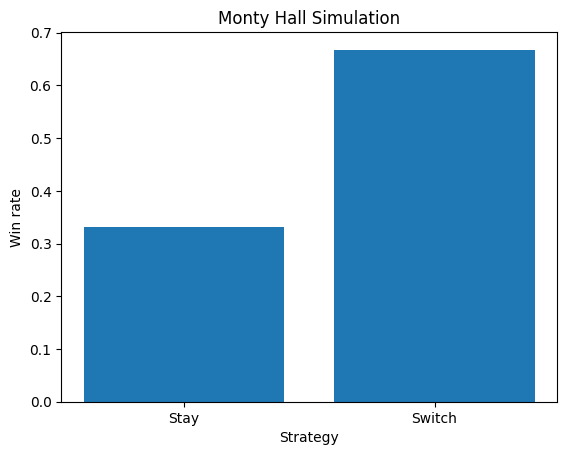

In [40]:
# Monty Hall simulation

stay_wins = 0
switch_wins = 0
num_iterations = 100000

for i in range(num_iterations):
  doors = ["goat", "goat", "car"]
  random.shuffle(doors)

  guess = random.randrange(3)
  player_choice = doors[guess]
  del(doors[guess])

  # Monty reveals a goat door
  for i in range(len(doors)):
    if doors[i] == "goat":
        del doors[i]
        break

  # if we stay, the only way we win is if our first choice is the car
  if player_choice == "car":
    stay_wins += 1

  # if we chose a goat and Monty revealed a goat, then we switch to the car
  # if we chose a car and Monty revealed a goat, then we switch to a goat
  if doors[0] == "car":
    switch_wins += 1

print(f"Stay win rate is {round(stay_wins / num_iterations * 100,2)}%")
print(f"Stay win rate is {round(switch_wins / num_iterations * 100,2)}%")

# Plot results

plt.bar(["Stay", "Switch"], [stay_wins / num_iterations, switch_wins / num_iterations])
plt.title("Monty Hall Simulation")
plt.xlabel("Strategy")
plt.ylabel("Win rate")
plt.show()

# So switching actually is the optimal strategy

In [74]:
# Birthday paradox
# Only 23 people are needed for the probability of a shared birthday to exceed 50%

from random import randint

num_iterations = 100000
num_people = 23
num_duplicates = 0

for i in range(num_iterations):
  birthdays = [randint(1,365) for j in range(num_people)]
  was_duplicate = False
  for _ in birthdays:
    if birthdays.count(_)>1:
      was_duplicate = True
      break
  if was_duplicate == True:
    num_duplicates += 1

prob = num_duplicates / num_iterations
print(f"Probability of a shared birthday is: {round(prob * 100,2)}%")

Probability of a shared birthday is: 50.64%


In [85]:
# Birthday paradox as a function

from random import randint

def birthday_paradox(n):
  num_duplicates = 0
  num_iterations = 1000000

  for i in range(num_iterations):
    birthdays = [randint(1,365) for j in range(n)]
    was_duplicate = False
    for _ in birthdays:
      if birthdays.count(_)>1:
        was_duplicate = True
        break
    if was_duplicate == True:
      num_duplicates += 1

  return num_duplicates / num_iterations

num_people = 30

print(f"Given {num_people} people, the probability of a shared birthday is: {round(birthday_paradox(num_people) * 100,2)}%")

Given 30 people, the probability of a shared birthday is: 70.6%


Given 50 people, the probability is 96.95%


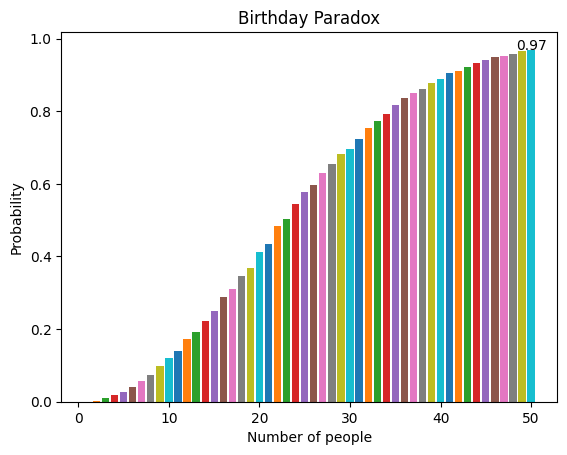

In [86]:
# Birthday paradox probability distribution

from random import randint

total_people = 50
num_iterations = 10000

for i in range(1, total_people+1):
  num_duplicates = 0

  for _ in range(num_iterations):
    birthdays = [randint(1,365) for j in range(i)]
    if len(birthdays) != len(set(birthdays)): # set() removes duplicates
      num_duplicates += 1

  prob = num_duplicates / num_iterations
  plt.bar(i, prob)

print(f"Given {total_people} people, the probability is {prob*100}%")

# Plot results

plt.title("Birthday Paradox")
plt.xlabel("Number of people")
plt.ylabel("Probability")
plt.annotate(f"{prob:.2f}", (i, prob), ha='center')
plt.show()

In [16]:
# This problem is similar to the Infinite Monkey Paradox.
# Suppose that a monkey presses 26 keys at random.
# What is the probability that he types HEY if he is:
# (a) allowed to repeat letters, and (b) not allowed to repeat letters?
# (Assume that the typewriter has precisely 26 symbols)

num_iterations = 100000
num_heys = 0

# (a)

for i in range(num_iterations):
  letters = [random.choice(string.ascii_uppercase) for j in range(26)]
  word = "".join(letters)
  if "HEY" in word:
    num_heys += 1

prob = num_heys / num_iterations
print(f"Probability that HEY is written is: {round(prob * 100,3)}%")

# (b)

for i in range(num_iterations):
  letters = random.sample(list(string.ascii_uppercase), k = 26)
  word = "".join(letters)
  if "HEY" in word:
    num_heys += 1

prob = num_heys / num_iterations
print(f"Probability that HEY is written is: {round(prob * 100,3)}%")

Probability that HEY is written is: 0.132%
Probability that HEY is written is: 0.31%


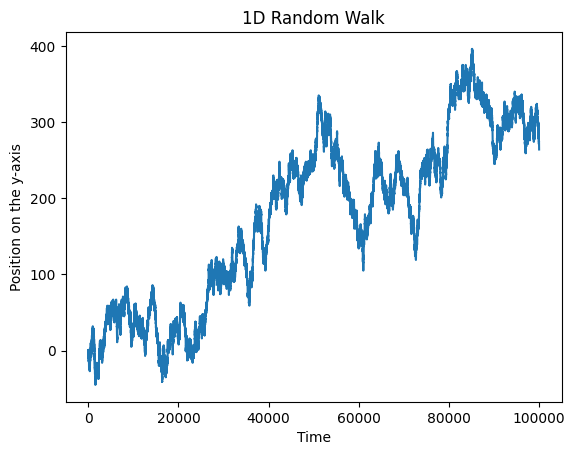

In [87]:
# 1D Random Walk

n = 100000
y = 0
time = np.arange(n+1)
positions = [y]
directions = ["UP", "DOWN"]

for i in range(1, n+1):
  step = random.choice(directions)
  if step == "UP":
    y += 1
  elif step == "DOWN":
    y -= 1
  positions.append(y)

# Plot results

plt.plot(time, positions)
plt.title("1D Random Walk")
plt.xlabel("Time")
plt.ylabel("Position on the y-axis")
plt.show()

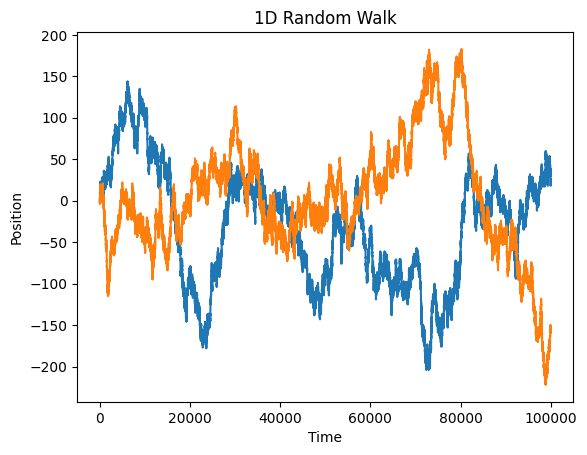

In [ ]:
# 1D Random Walk as a function

def randomwalk_1D(n):
  y = 0
  time = np.arange(n+1)
  positions = [y]
  directions = ["UP", "DOWN"]

  for i in range(1, n+1):
    step = random.choice(directions)
    if step == "UP":
      y += 1
    elif step == "DOWN":
      y -= 1
    positions.append(y)
  return time, positions

randomwalk1 = randomwalk_1D(100000)
randomwalk2 = randomwalk_1D(100000)

# Plot results

plt.plot(randomwalk1[0], randomwalk1[1])
plt.plot(randomwalk2[0], randomwalk2[1])
plt.title("1D Random Walk")
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()

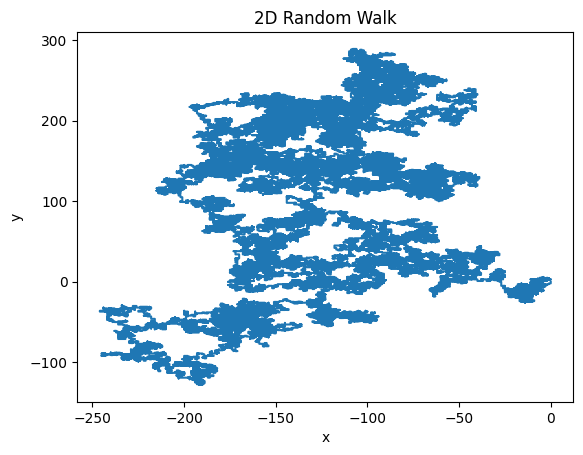

In [ ]:
# 2D Random Walk

def randomwalk_2D(n):
  x = np.zeros(n) # 1xn zero vector
  y = np.zeros(n)
  directions = ["UP", "DOWN", "LEFT", "RIGHT"]
  for i in range(1, n):
    step = random.choice(directions)
    if step == "UP":
      x[i] = x[i-1]
      y[i] = y[i-1] + 1
    elif step == "DOWN":
      x[i] = x[i-1]
      y[i] = y[i-1] - 1
    elif step == "LEFT":
      x[i] = x[i-1] - 1
      y[i] = y[i-1]
    elif step == "RIGHT":
      x[i] = x[i-1] + 1
      y[i] = y[i-1]
  return x, y

# Plot results

x_points, y_points = randomwalk_2D(100000)
plt.plot(x_points, y_points)
plt.title("2D Random Walk")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

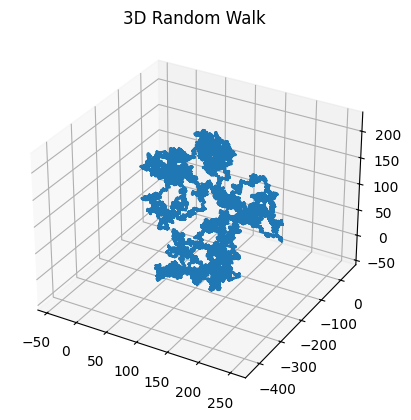

In [88]:
# 3D Random Walk

def randomwalk_3D(n):
  x = np.zeros(n) # 1xn zero vector
  y = np.zeros(n)
  z = np.zeros(n)
  directions = ["UP", "DOWN", "LEFT", "RIGHT", "Z-POS", "Z-NEG"]

  for i in range(1, n):
    step = random.choice(directions)
    if step == "UP":
      x[i] = x[i-1]
      y[i] = y[i-1] + 1
      z[i] = z[i-1]
    elif step == "DOWN":
      x[i] = x[i-1]
      y[i] = y[i-1] - 1
      z[i] = z[i-1]
    elif step == "LEFT":
      x[i] = x[i-1] - 1
      y[i] = y[i-1]
      z[i] = z[i-1]
    elif step == "RIGHT":
      x[i] = x[i-1] + 1
      y[i] = y[i-1]
      z[i] = z[i-1]
    elif step == "Z-POS":
      x[i] = x[i-1]
      y[i] = y[i-1]
      z[i] = z[i-1] + 1
    elif step == "Z-NEG":
      x[i] = x[i-1]
      y[i] = y[i-1]
      z[i] = z[i-1] - 1
  return x, y, z

# Plot results

x_points, y_points, z_points = randomwalk_3D(100000)
axes = plt.subplot(1, 1, 1, projection='3d')
axes.plot3D(x_points, y_points, z_points)
axes.scatter(x_points[-1], y_points[-1], z_points[-1])
axes.set_title("3D Random Walk")
plt.show()

In [38]:
# Gambler's ruin

def gamblers_ruin(starting_cash, goal, p_success):
  capital = starting_cash

  while 0 < capital < goal:
    outcome = random.uniform(0,1)
    if outcome < p_success:
      capital += 1
    else:
      capital -= 1
  return capital == goal

num_iterations = 1000000
successes = 0

for i in range(num_iterations):
  success = gamblers_ruin(10, 20, 0.45)
  if success == True:
    successes += 1

prob = successes / num_iterations
print(f"Probability of success is: {prob * 100}%")

# Result using the Gambler's ruin formula below
# Source: https://en.wikipedia.org/wiki/Gambler%27s_ruin

print(f"Given parameters (10, 20, 0.45), probability of success is {round((1 - ((1-0.45)/0.45)**10)/(1 - ((1-0.45)/0.45)**20)*100,2)}%")

Probability of success is: 11.8717%
Given parameters (10, 20, 0.45), probability of success is 11.85%


In [39]:
# Buffon's needle
# Solution inspired by https://en.wikipedia.org/wiki/Buffon%27s_needle_problem

def buffons(num_iterations, needle_length, space_between_lines):
  intersections = 0

  for i in range(num_iterations):
    angle = random.uniform(0, 90)
    angle_in_radians = math.radians(angle)
    distance_center_to_line = random.uniform(0, space_between_lines/2)
    if distance_center_to_line <= (needle_length/2)*math.sin(angle_in_radians):
      intersections += 1

  return intersections

print(f"The number of intersections is {buffons(1000, 1, 1)}")

# Estimating pi: pi = 2/prob_of_intersection * needle length/space_between_lines

def buffons_pi_estimate(num_iterations, needle_length, space_between_lines):
  intersections = 0

  for i in range(num_iterations):
    angle = random.uniform(0, 90)
    angle_in_radians = math.radians(angle)
    distance_center_to_line = random.uniform(0, space_between_lines/2)
    if distance_center_to_line <= (needle_length/2)*math.sin(angle_in_radians):
      intersections += 1

  return (needle_length/space_between_lines)*2*(num_iterations/intersections)

print("Our estimate of pi is", round(buffons_pi_estimate(1000000, 1, 1),5))
print("The actual value of pi is 3.14159")

The number of intersections is 674
Our estimate of pi is 3.14306
The actual value of pi is 3.14159


In [ ]:
# Hypergeometric distribution example
# A company consists of m = 24 men and w = 30 women. Each
# of the employee is to be randomly promoted with probability 1/3 independently
# of the other employees.
# Find the expected number of women that will be promoted given that
# the total number of employees promoted was 15.

def expected_women_promoted(num_iterations, m, w, p, total):
  total_women_promoted = 0
  successful_iterations = 0

  for i in range(num_iterations):
    men_promoted = [random.random() < prob for j in range(m)]
    women_promoted = [random.random() < prob for j in range(w)]

    if sum(men_promoted) + sum(women_promoted) == total:
      successful_iterations += 1
      total_women_promoted += sum(women_promoted)

  if successful_iterations == 0:
    return None

  return total_women_promoted / successful_iterations

print(f"The expected number of women promoted is {expected_women_promoted(1000000, 24, 30, 1/3, 15)}")

# Using the formula for expectation of hypergeometric distribution, we get
# that E[number of women promoted | 15 employees were promoted] ~ 8.33

The expected number of women promoted is 8.331161780673181


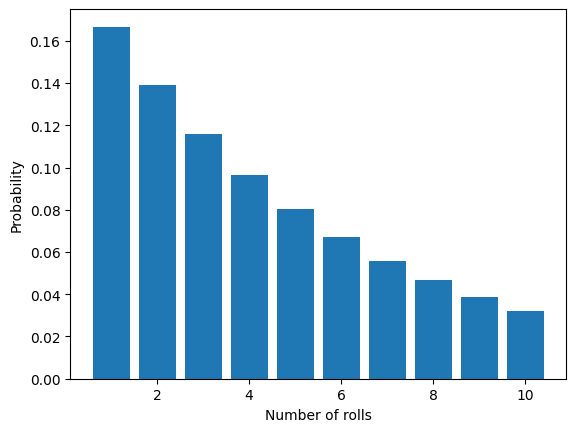

In [ ]:
# Geometric distribution example
# What is the likelihood of observing your first ONE on the first dice roll,
# second dice roll, third dice roll, etc?

from scipy import stats

num_rolls = 10
prob_success = 1/6

geom_dist = stats.geom(prob_success)

pmf = {"num_rolls": [],
       "probability": []}

for i in range(num_rolls):
  pmf["num_rolls"].append(i+1)
  pmf["probability"].append(geom_dist.pmf(i+1))

plt.bar(pmf["num_rolls"], pmf["probability"])
plt.xlabel("Number of rolls")
plt.ylabel("Probability")
plt.show()